## Boston Housing Data:

- We consider three possible tasks:
    1. A __supervised predictive task__, where the outcome variable of interest is the median value of a home in the tract __(MEDV)__. <br><br>
    2. A __supervised classification task__, where the outcome variable of interest is the binary variable CAT.MEDV that indicates whether the home value is above or below _$30,000_. <br><br>
    3. An __unsupervised task__, where the goal is to __cluster census tracts__.<br><br>

__(MEDV and CAT.MEDV are not used together in any of the three cases)__

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from warnings import filterwarnings
filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (11, 7)
sns.set_style("whitegrid")
!cowsay --character tux "HELLO THERE, I'm just bored getting my hands back on basics!"

  _________________________________________________
 /                                                 \
| HELLO THERE, I'm just bored getting my hands back |
|  on basics!                                       |
 \                                                 /
                                                      \
                                                       \
                                                        \
                                                         .--.
                                                        |o_o |
                                                        |:_/ |
                                                       //   \ \
                                                      (|     | )
                                                     /'\_   _/`\
                                                     \___)=(___/


## Load Data 📚

In [2]:
boston = load_boston()
pd.DataFrame(boston.data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
pd.DataFrame(boston.target).head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
cols = boston.feature_names
cols

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
raw_df = pd.DataFrame(data = boston.data, columns = cols)
raw_df['MEDV'] = boston.target
raw_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## EDA 📌

In [6]:
raw_df.describe().T.style.highlight_max(subset = ['max'], color = 'orange')

,count,mean,std,min,25%,50%,75%,max
CRIM,506.000000,3.613524,8.601545,0.006320,0.082045,0.256510,3.677083,88.976200
ZN,506.000000,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000
INDUS,506.000000,11.136779,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.000000,0.069170,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.000000,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,506.000000,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,506.000000,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
DIS,506.000000,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,506.000000,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.000000,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


In [7]:
raw_df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [8]:
# -- very important method or command to visualize overall distribution of the dataset.
# raw_df.hist(color = 'teal', figsize = (15, 15),);

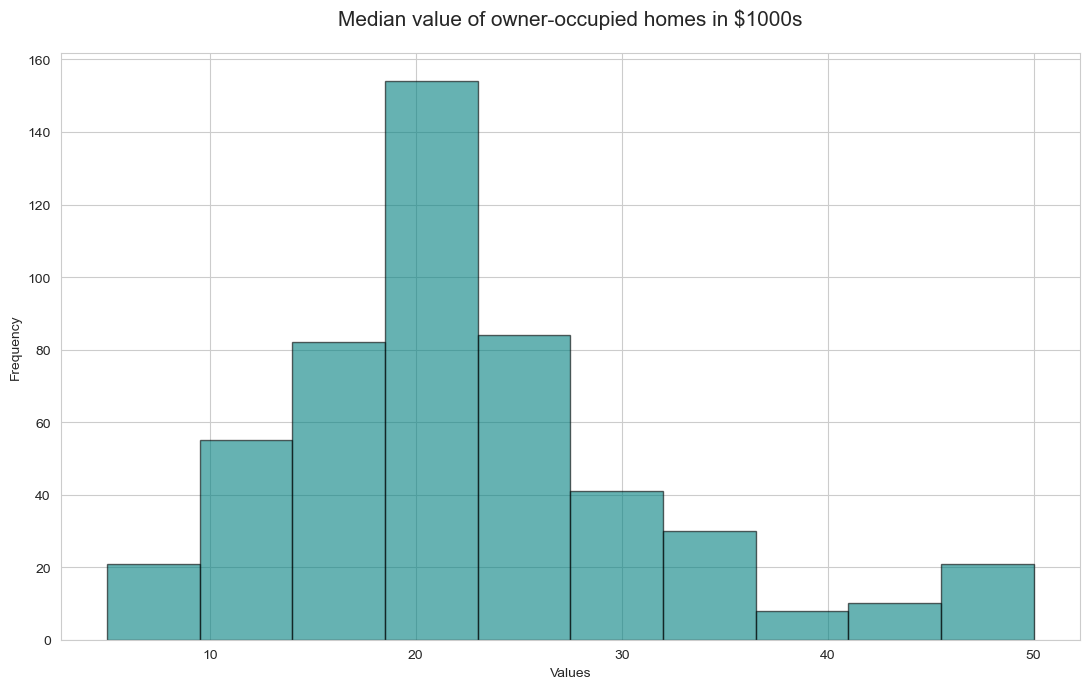

In [9]:
# -- Distribution of variables (MEDV).
plt.title("Median value of owner-occupied homes in $1000s", size = 15, pad  = 20)
raw_df['MEDV'].plot.hist(color = 'teal', edgecolor = "black", alpha = .6,)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.tight_layout()

NOTE:
- The distribution of features is far from ideal.  With the exception of RM, all other features exhibit a non-normal distribution

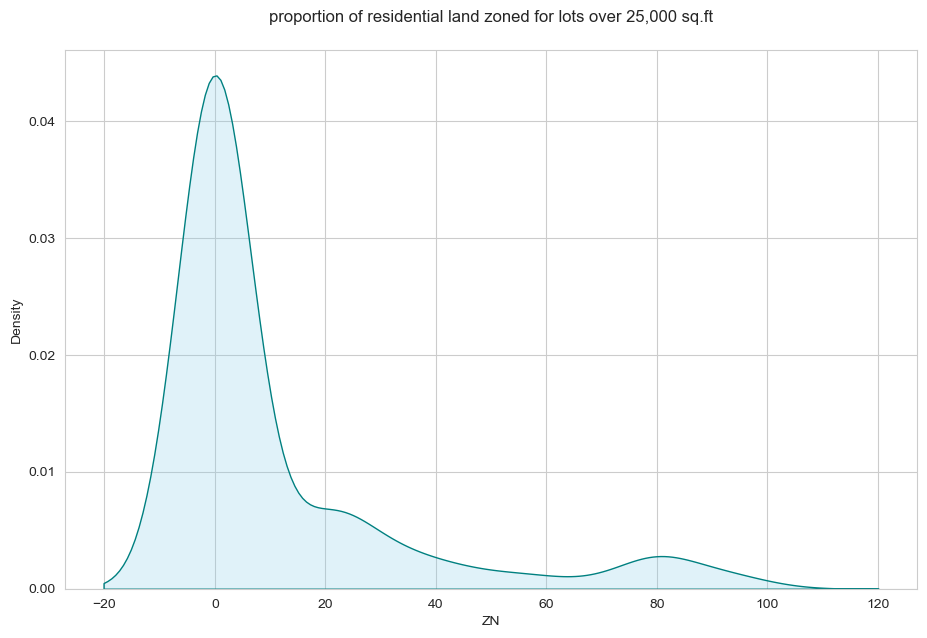

In [10]:
""" ZN: proportion of residential land zoned for lots over 25,000 sq.ft. """
plt.title("proportion of residential land zoned for lots over 25,000 sq.ft", pad = 20)
sns.kdeplot(data = raw_df, x = 'ZN', fill = True, color = 'skyblue', edgecolor = 'teal');

NOTE: 
- Distribution is follows positive direction.
- Data is __Positively skewed__ meaning right skewed.
- Presence of outliers.

total people older than 90 years: 170


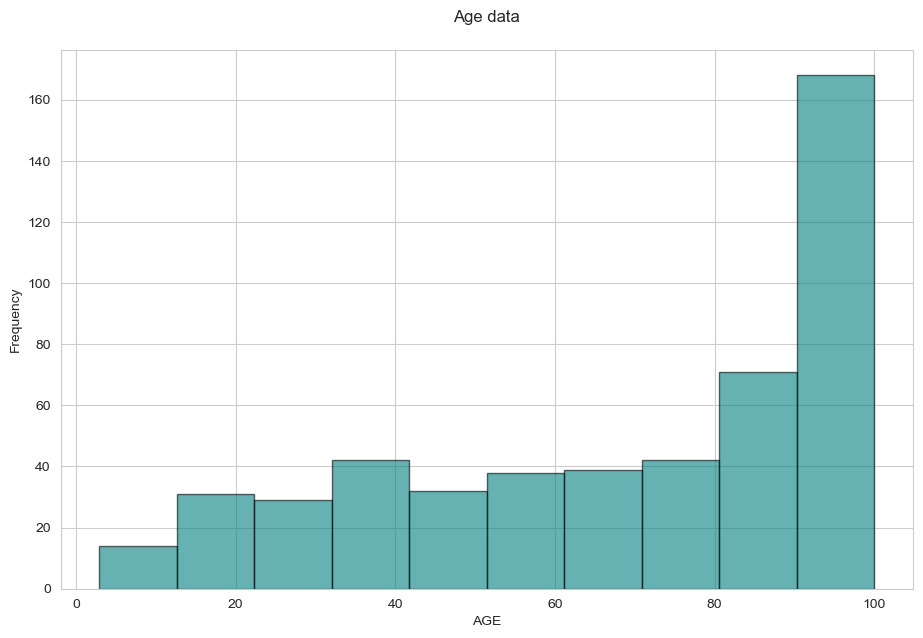

In [11]:
# -- Houses in which where some people are older than 90 years. (OUTLIER)
# -- definitely people can live longer lif
# -- back then people used to live long enough compared to today.
filt = raw_df['AGE'] >= 90
print(f"total people older than 90 years: {len(raw_df.loc[filt])}")

plt.title("Age data", pad = 20)
raw_df['AGE'].plot.hist(color = 'teal', edgecolor = 'black', alpha = .6,)
plt.xlabel("AGE")
plt.show()

In [12]:
print(raw_df.head(), boston.DESCR, sep = "\n\n")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - Z

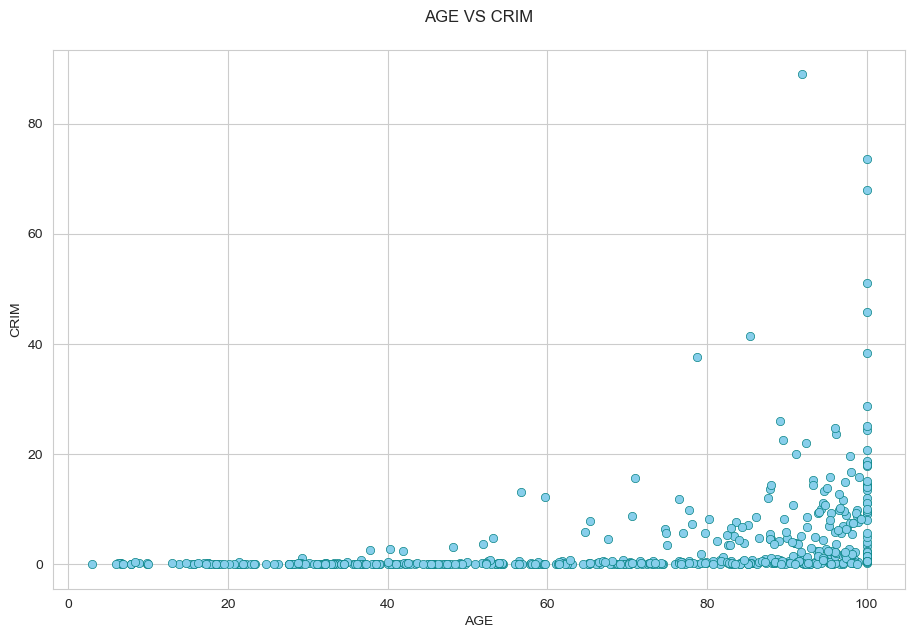

In [13]:
""" Visualizing relationship between variables """
sns.scatterplot(x = 'AGE', y = 'CRIM', data = raw_df, color = 'skyblue', edgecolor = 'teal',)
plt.title("AGE VS CRIM", pad = 20)
plt.show()

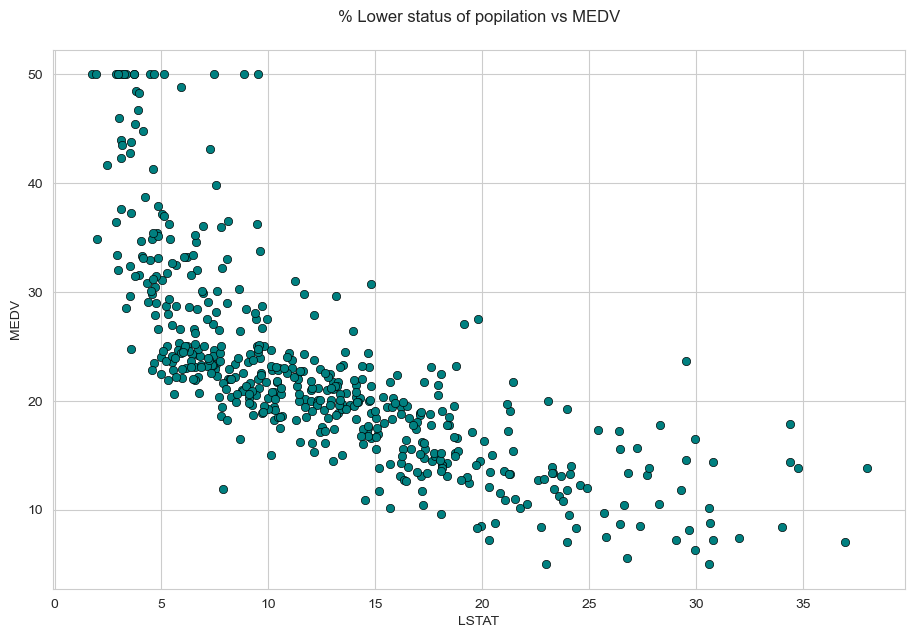

In [14]:
""" Visualizing relationship between variables """
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = raw_df, color ='teal', edgecolor = 'black')
plt.title("% Lower status of popilation vs MEDV", pad = 20)
plt.show()

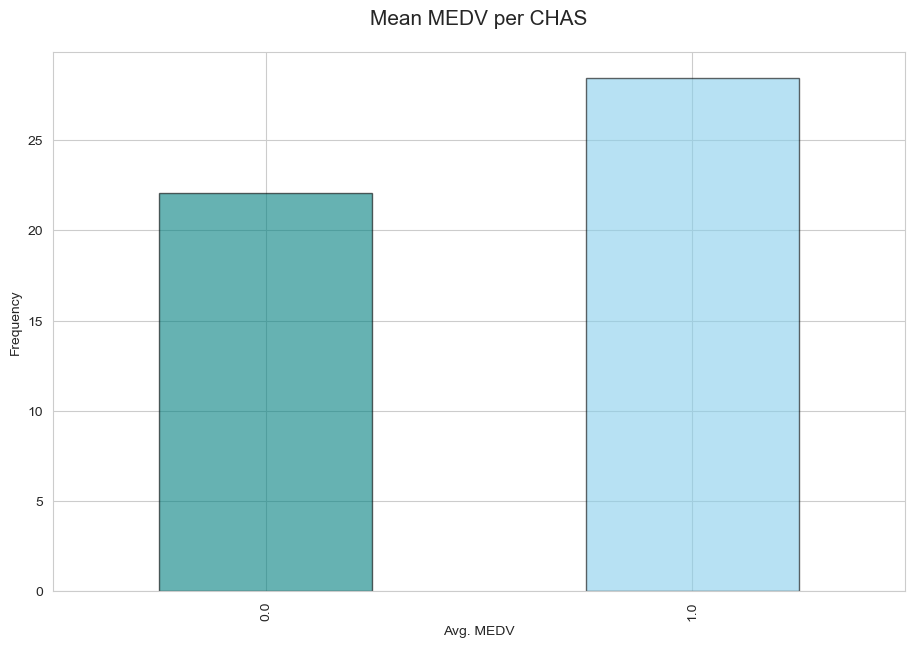

In [15]:
""" CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). 
    * Compute mean MEDV per CHAS = (0, 1)
"""
_ = (raw_df.groupby("CHAS")
     .mean()["MEDV"]
     .plot(
         kind = 'bar', 
         color = ['teal', 'skyblue'],
         alpha = .6, 
         edgecolor = 'black',
         )
    )
plt.xlabel("Avg. MEDV")
plt.ylabel("Frequency")
plt.title("Mean MEDV per CHAS", size = 15, pad = 20)
plt.show()

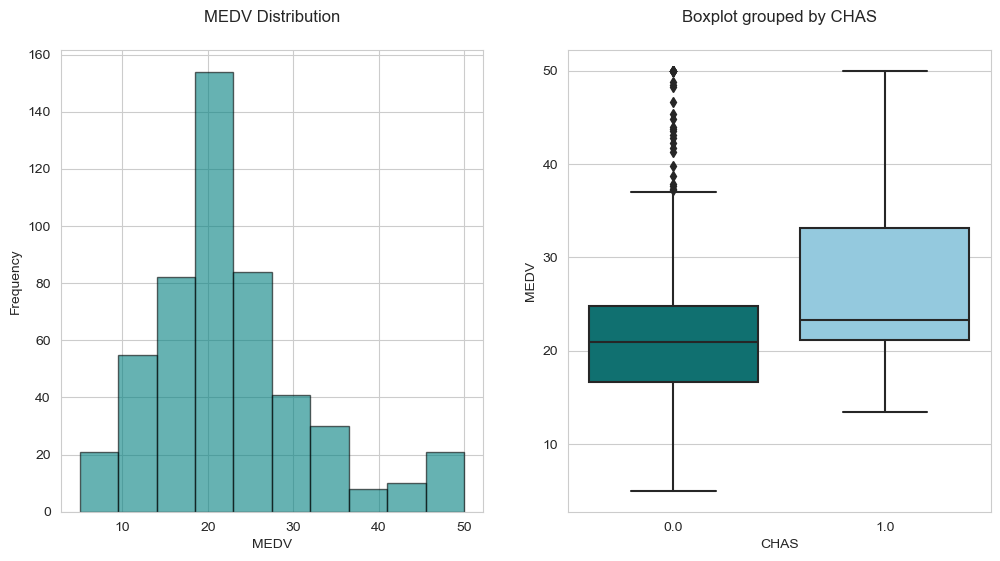

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 
raw_df['MEDV'].plot.hist(color = 'teal', alpha = .6, ax = ax1, edgecolor = 'black')
ax1.set_xlabel("MEDV")
ax1.set_title("MEDV Distribution", pad = 20)

sns.boxplot(data = raw_df, x = 'CHAS', y = 'MEDV', ax = ax2, palette = ['teal', 'skyblue'],)
ax2.set_xlabel("CHAS")
ax2.set_title("Boxplot grouped by CHAS", pad = 20)
fig.show()

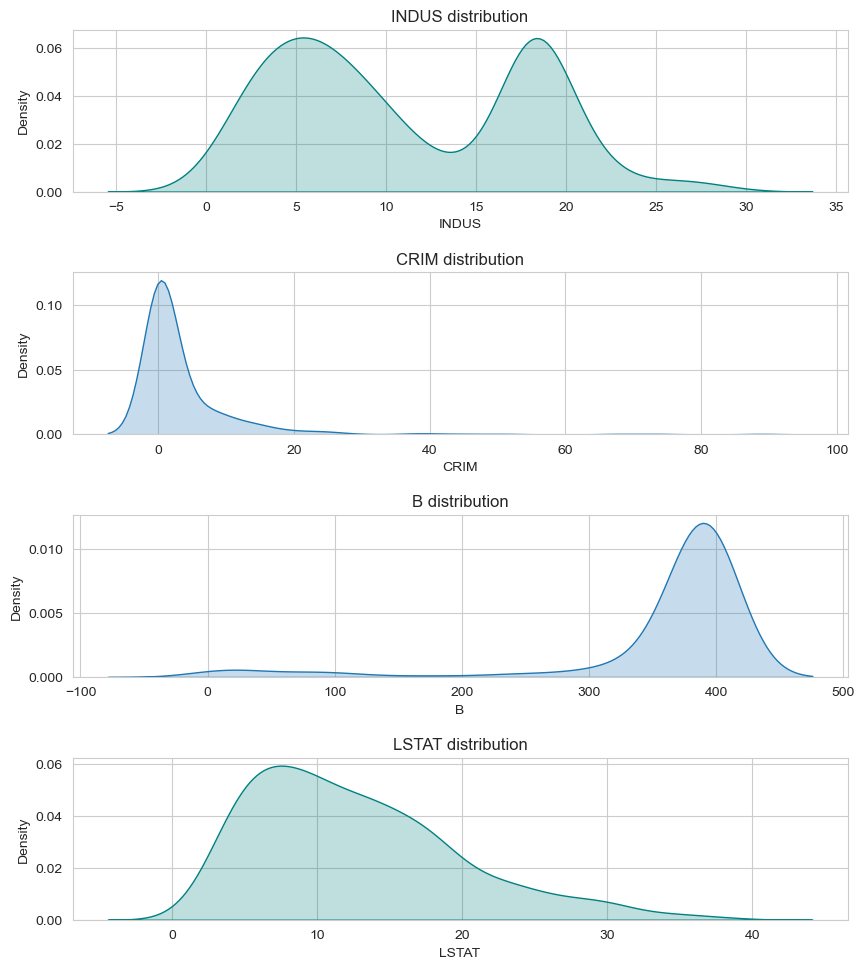

In [17]:
""" Distribution plots of some columns of interest """
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize = (10, 10))
sns.kdeplot(data = raw_df, x = 'INDUS', fill = True, ax = ax1, color = 'teal',)
sns.kdeplot(data = raw_df, x = 'CRIM', fill = True, ax = ax2,)
sns.kdeplot(data = raw_df, x = 'B', fill = True, ax = ax3,)
sns.kdeplot(data = raw_df, x = 'LSTAT', fill = True, ax = ax4, color = 'teal',)

ax1.set_title("INDUS distribution")
ax2.set_title("CRIM distribution")
ax3.set_title("B distribution")
ax4.set_title("LSTAT distribution")

fig.suptitle('')
fig.subplots_adjust(hspace = 0.5, top = 1)
fig.show()

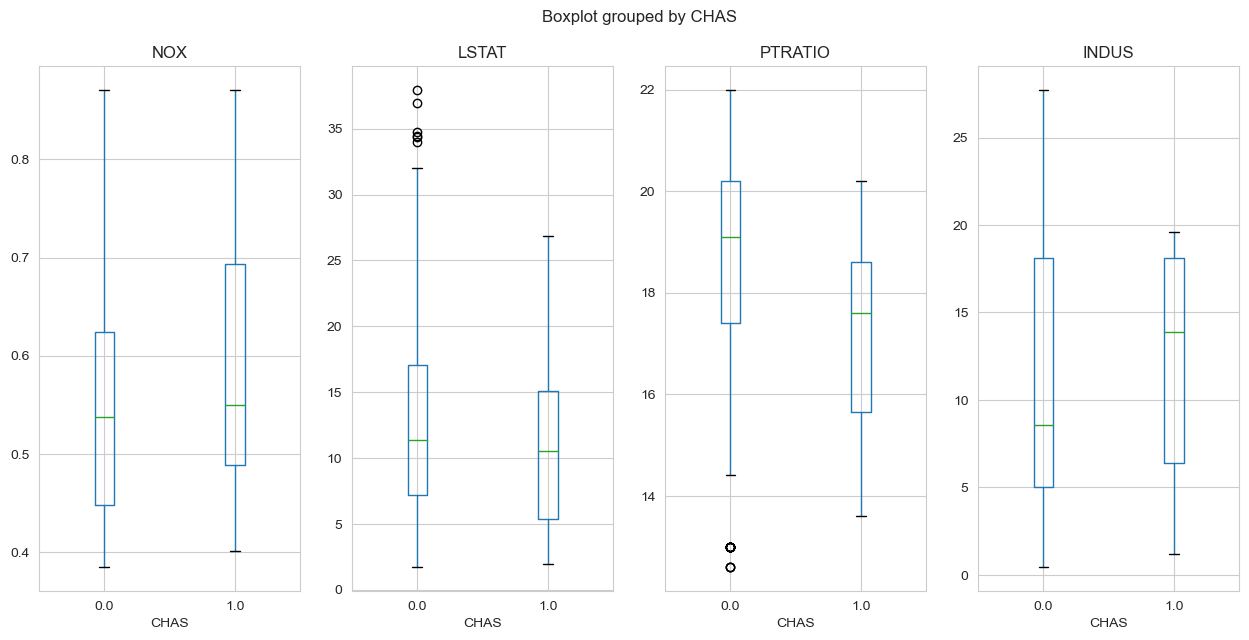

In [18]:
""" Side by side boxplot for exploring the binary categorical column CHAS.
    - There are outliers.
"""
fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (15, 7),)
raw_df.boxplot(column = "NOX", by = "CHAS", ax = axs[0])
raw_df.boxplot(column = "LSTAT", by = "CHAS", ax = axs[1])
raw_df.boxplot(column = "PTRATIO", by = "CHAS", ax = axs[2])
raw_df.boxplot(column = "INDUS", by = "CHAS", ax = axs[3]);

## Heatmaps 🧮

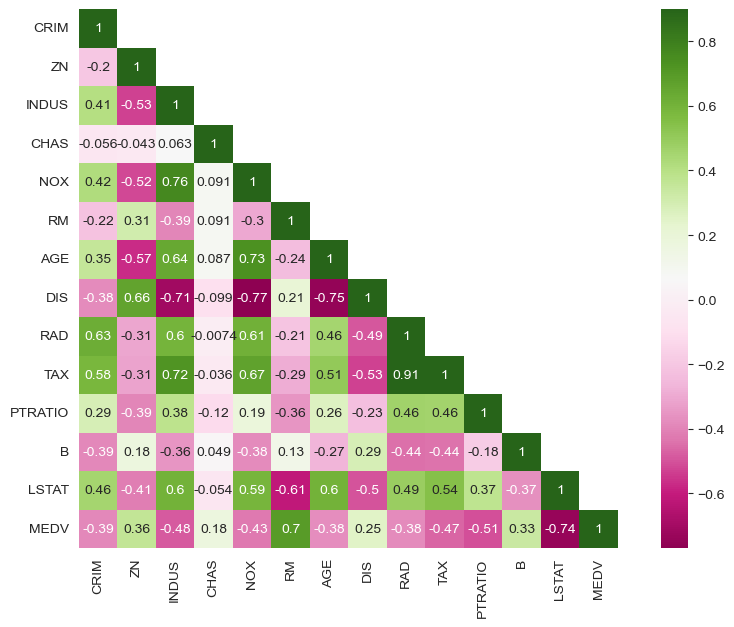

In [19]:
corr = raw_df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask = mask, square = True, annot = True, vmax = .9, cmap = 'PiYG');

NOTE:
- Darker values denote stronger correlation.